# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [173]:
# 라이브러리
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [174]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [176]:
# object인 변수 확인
print(data['BusinessTravel'].value_counts())

# 0~2 -> 높을수록 자주
data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely':1, 
                                                     'Travel_Frequently':2,
                                                     'Non-Travel':0})
data['BusinessTravel'].value_counts()

Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64


1    892
2    230
0    128
Name: BusinessTravel, dtype: int64

In [177]:
print(data['Department'].value_counts())

# 0~2 -> 부서별 나눔. 숫자에 의미는 없음.
data['Department'] = data['Department'].map({'Research & Development':2, 
                                             'Sales':1,
                                             'Human Resources':0})
data['Department'].value_counts()


Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64


2    819
1    379
0     52
Name: Department, dtype: int64

In [178]:
print(data['EducationField'].value_counts())

# 0~6 : 전공을 나누기위해 설정. 의미없음
# 0은 종합적인 의미로 other
data['EducationField'] = data['EducationField'].map({'Life Sciences':5, 
                                                     'Medical':4,
                                                     'Marketing':3,
                                                     'Technical Degree':2,
                                                     'Human Resources':1,
                                                      'Other':0})
data['EducationField'].value_counts()

Life Sciences       520
Medical             390
Marketing           137
Technical Degree    112
Other                68
Human Resources      23
Name: EducationField, dtype: int64


5    520
4    390
3    137
2    112
0     68
1     23
Name: EducationField, dtype: int64

In [179]:
print(data['Gender'].value_counts())

# 0 : 여성
# 1 : 남성
data['Gender'] = data['Gender'].map({'Male':1,
                                     'Female':0})
data['Gender'].value_counts()

Male      760
Female    490
Name: Gender, dtype: int64


1    760
0    490
Name: Gender, dtype: int64

In [180]:
print(data['JobRole'].value_counts())

# 부서와 전공의 충분한 설명으로 해당 데이터 삭제
data = data.drop('JobRole', axis=1)

Sales Executive              283
Research Scientist           246
Laboratory Technician        227
Manufacturing Director       123
Healthcare Representative    110
Manager                       87
Research Director             66
Sales Representative          65
Human Resources               43
Name: JobRole, dtype: int64


In [181]:
print(data['EmployeeNumber'].value_counts())

# 사원번호는 필요 없다고 판단

data = data.drop('EmployeeNumber', axis=1)

2048    1
1367    1
1379    1
1374    1
1373    1
       ..
656     1
655     1
653     1
649     1
2046    1
Name: EmployeeNumber, Length: 1250, dtype: int64


In [182]:
print(data['MaritalStatus'].value_counts())

# Divorced : 2  - 특이사항이라 생각하여 2
# Married : 1   - Y
# Single : 0    - N
data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced':2,
                                                   'Married':1,
                                                   'Single':0})
data['MaritalStatus'].value_counts()


Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64


1    570
0    404
2    276
Name: MaritalStatus, dtype: int64

In [183]:
print(data['OverTime'].value_counts())

# 1 : yes
# 0 : No
data['OverTime'] = data['OverTime'].map({'Yes':1, 
                                         'No':0})
data['OverTime'].value_counts()

No     896
Yes    354
Name: OverTime, dtype: int64


0    896
1    354
Name: OverTime, dtype: int64

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   int64  
 3   Department                1250 non-null   int64  
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   int64  
 7   EnvironmentSatisfaction   1250 non-null   int64  
 8   Gender                    1250 non-null   int64  
 9   JobInvolvement            1250 non-null   int64  
 10  JobSatisfaction           1250 non-null   int64  
 11  MaritalStatus             1250 non-null   int64  
 12  MonthlyIncome             1250 non-null   int64  
 13  NumCompaniesWorked        1229 non-null   float64
 14  OverTime

In [185]:
# 결측치 확인
data.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [186]:
# 결측치 처리
# 두 변수의 가장 빈번한 값으로 변경

fre_DistanceFromHome = data['DistanceFromHome'].value_counts().idxmax()
fre_NumCompaniesWorked = data['NumCompaniesWorked'].value_counts().idxmax()
data['DistanceFromHome'].fillna(fre_DistanceFromHome, inplace=True)
data['NumCompaniesWorked'].fillna(fre_NumCompaniesWorked, inplace=True)

data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [187]:
# x,y 구분
target = 'Attrition'
y = data[target]
x = data.drop(target, axis=1)
y.value_counts()

No     1050
Yes     200
Name: Attrition, dtype: int64

In [188]:
# y = (0,1) 변경
y = data[target].map({'No':0, 'Yes':1})
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

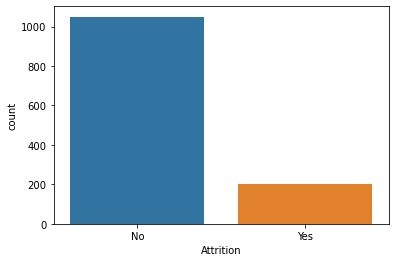

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x=target)
plt.show()

# 데이터 불균형이 심하다.
# 결과에 영향을 미칠 것임.

In [190]:
# train,test 구분
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,
                                                 random_state=2022)

In [191]:
x_train.shape, y_train.shape

((1000, 23), (1000,))

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

### Locally connected layer를 구성하기 위한 feature 설정

In [192]:
x_train.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [193]:
# personal = x_train[['Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus']]
# survey = x_train[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]
# company_out = x_train[['DistanceFromHome', 'NumCompaniesWorked']]
# company_in = x_train[['BusinessTravel', 'Department', 'MonthlyIncome',
#                       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

# # 변수 그룹 : 개인특징, 설문조사, 회사 내,외부 총 4개

In [194]:
# personal_test = x_test[['Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus']]
# survey_test = x_test[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]
# company_out_test = x_test[['DistanceFromHome', 'NumCompaniesWorked']]
# company_in_test = x_test[['BusinessTravel', 'Department', 'MonthlyIncome',
#                           'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#                           'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [195]:
# 변수그룹 : 개인특징, 설문조사, 회사외부, 수입, 기타
personal = x_train[['Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus']]
survey = x_train[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]
money = x_train[['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']]
company_out = x_train[['DistanceFromHome', 'NumCompaniesWorked']]
etc = x_train[['BusinessTravel', 'Department', 'OverTime', 'TotalWorkingYears',
               'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager']]

In [196]:
personal_test = x_test[['Age', 'Education', 'EducationField', 'Gender', 'MaritalStatus']]
survey_test = x_test[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']]
money_test = x_test[['MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']]
company_out_test = x_test[['DistanceFromHome', 'NumCompaniesWorked']]
etc_test = x_test[['BusinessTravel', 'Department', 'OverTime', 'TotalWorkingYears',
               'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsWithCurrManager']]

In [197]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 412 to 893
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             1000 non-null   int64
 1   Education       1000 non-null   int64
 2   EducationField  1000 non-null   int64
 3   Gender          1000 non-null   int64
 4   MaritalStatus   1000 non-null   int64
dtypes: int64(5)
memory usage: 46.9 KB


### 모델 코드 작성

In [198]:
y.astype(float)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1245    0.0
1246    0.0
1247    0.0
1248    0.0
1249    0.0
Name: Attrition, Length: 1250, dtype: float64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   int64  
 3   Department                1250 non-null   int64  
 4   DistanceFromHome          1250 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   int64  
 7   EnvironmentSatisfaction   1250 non-null   int64  
 8   Gender                    1250 non-null   int64  
 9   JobInvolvement            1250 non-null   int64  
 10  JobSatisfaction           1250 non-null   int64  
 11  MaritalStatus             1250 non-null   int64  
 12  MonthlyIncome             1250 non-null   int64  
 13  NumCompaniesWorked        1250 non-null   float64
 14  OverTime

In [200]:
print(personal.shape, survey.shape, money.shape, company_out.shape, etc.shape)
print(x_train.shape, y_train.shape)

(1000, 5) (1000, 5) (1000, 3) (1000, 2) (1000, 8)
(1000, 23) (1000,)


In [201]:
# 청소
keras.backend.clear_session()

# 모델 연결
il_full = keras.layers.Input(shape=(23,))

il_p = keras.layers.Input(shape=(5,), name='il_personal')  # 개인성격
hl_p = keras.layers.Dense(8, activation='relu')(il_p)

il_s = keras.layers.Input(shape=(5,), name='il_survey')    # 설문조사
hl_s = keras.layers.Dense(8, activation='relu')(il_s)

il_m = keras.layers.Input(shape=(3,), name='il_money')  # 수입
hl_m = keras.layers.Dense(8, activation='relu')(il_m)

il_co = keras.layers.Input(shape=(2,), name='il_company_out')  # 회사외부
hl_co = keras.layers.Dense(8, activation='relu')(il_co)

il_etc = keras.layers.Input(shape=(8,), name='il_etc')  # 기타
hl_etc = keras.layers.Dense(8, activation='relu')(il_etc)

add = keras.layers.Add()([hl_p, hl_s, hl_m, hl_co, hl_etc])

cl = keras.layers.Concatenate()([add, il_full])
hl = keras.layers.Dense(128, activation='relu')(cl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)



# 모델 선언
model = keras.models.Model([il_full, il_p, il_s, il_m, il_co, il_etc], ol)

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 il_personal (InputLayer)       [(None, 5)]          0           []                               
                                                                                                  
 il_survey (InputLayer)         [(None, 5)]          0           []                               
                                                                                                  
 il_money (InputLayer)          [(None, 3)]          0           []                               
                                                                                                  
 il_company_out (InputLayer)    [(None, 2)]          0           []                               
                                                                                              

### 모델 구조 시각화

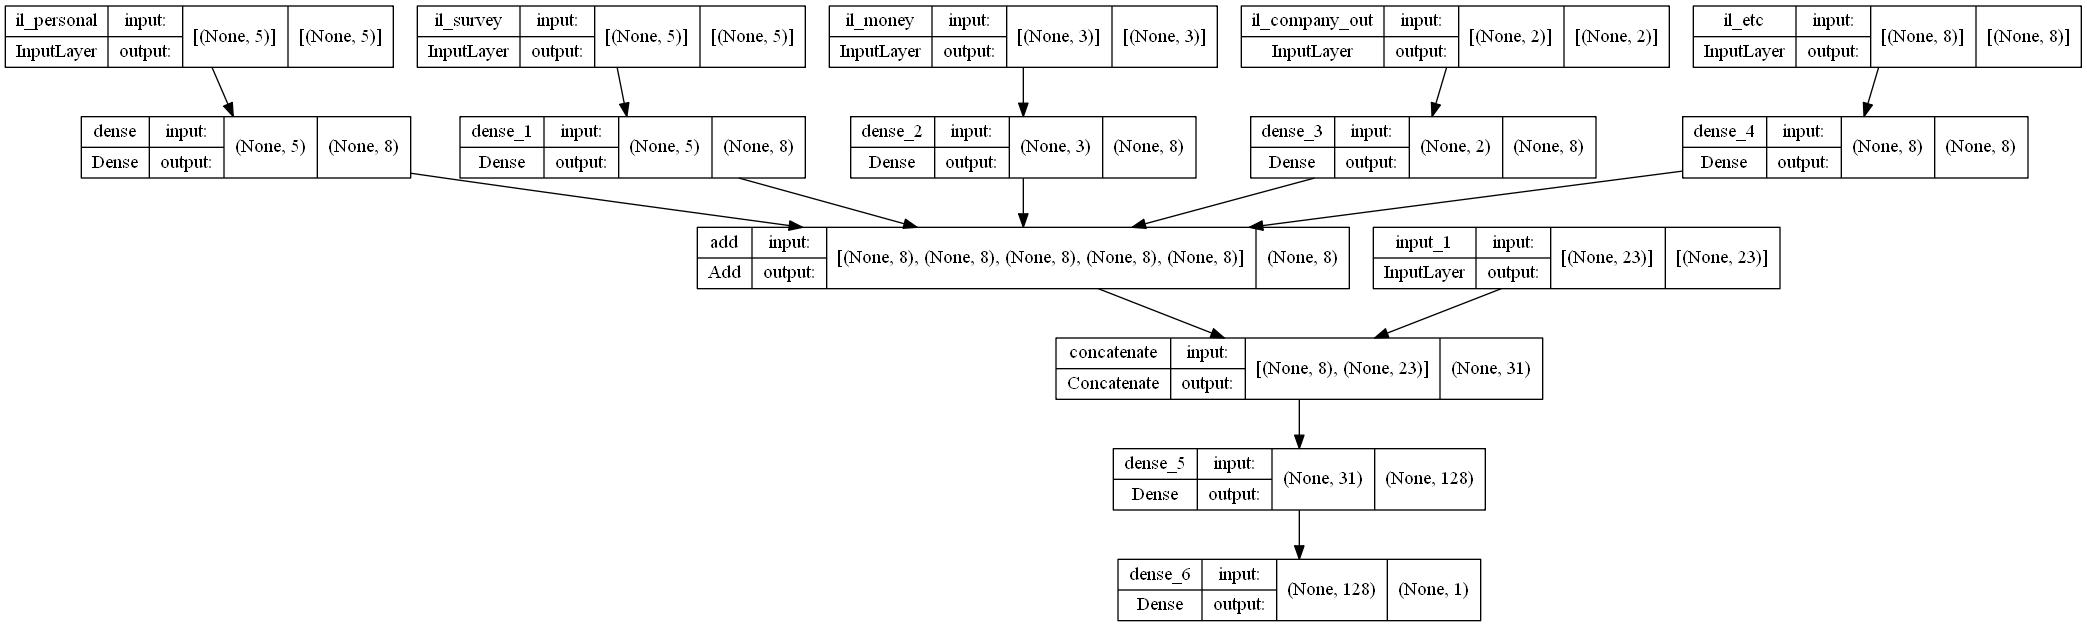

In [202]:
# 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

### 모델 학습

In [203]:
type(y_train)

pandas.core.series.Series

In [204]:
train_list = [x_train, personal, survey, money, company_out, etc]
test_list = [x_test, personal_test, survey_test, money_test, company_out_test, etc_test]

In [205]:
type([x_train, personal, survey, money, company_out, etc])

list

In [206]:
model.fit(train_list, y_train,
          epochs=25, 
          verbose=1, 
          validation_split=0.1)

Epoch 1/25
29/29 [==============================] - 1s 12ms/step - loss: 229.4051 - accuracy: 0.5500 - val_loss: 88.3766 - val_accuracy: 0.8400
Epoch 2/25
29/29 [==============================] - 0s 4ms/step - loss: 47.5247 - accuracy: 0.8433 - val_loss: 22.3939 - val_accuracy: 0.8400
Epoch 3/25
29/29 [==============================] - 0s 4ms/step - loss: 6.0348 - accuracy: 0.7633 - val_loss: 3.1040 - val_accuracy: 0.8400
Epoch 4/25
29/29 [==============================] - 0s 4ms/step - loss: 1.2675 - accuracy: 0.7633 - val_loss: 5.1382 - val_accuracy: 0.8400
Epoch 5/25
29/29 [==============================] - 0s 4ms/step - loss: 1.4234 - accuracy: 0.7922 - val_loss: 0.9352 - val_accuracy: 0.8400
Epoch 6/25
29/29 [==============================] - 0s 5ms/step - loss: 3.6235 - accuracy: 0.7856 - val_loss: 3.9779 - val_accuracy: 0.8400
Epoch 7/25
29/29 [==============================] - 0s 4ms/step - loss: 3.1639 - accuracy: 0.7889 - val_loss: 17.5871 - val_accuracy: 0.1600
Epoch 8/25
29

### 모델 예측

In [207]:
model.evaluate(test_list, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 4.5591 - accuracy: 0.8280


[4.559148788452148, 0.828000009059906]

In [208]:
y_pred = model.predict(test_list)
y_pred[:5]

array([[1.4363304e-14],
       [7.0476467e-08],
       [1.4708738e-30],
       [2.2347979e-07],
       [2.1356797e-08]], dtype=float32)

In [209]:
# y - (0,1) 변경
for idx, val in enumerate(y_pred):
    if val >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0
        
y_pred[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.
---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      1.00      0.91       207
         Yes       0.00      0.00      0.00        43

    accuracy                           0.83       250
   macro avg       0.41      0.50      0.45       250
weighted avg       0.69      0.83      0.75       250



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 모델의 정확도 : accuracy
- 이직이라 예측한 것 중 실제로 이직한 비율 : <1> precision
- 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율 : <1> recall
- 남는다고 예측한 것 중 실제로 남아있는 비율 : <0> precision

- **locally model**
 - accuracy : 0.82
 - <1> precision : 0.44
 - <1> recall : 0.28
 - <0> precision : 0.86
 
 
 - <0> recall 이 가장 좋은 수치를 기록하였다.
 - <1> recall 이 매우 안 좋다.
 - 데이터 불균형으로 인해 영향이 미친 것으로 보인다.

----

#### multilayer perceptron 구조

In [211]:
x_train.shape, y_train.shape

((1000, 23), (1000,))

In [212]:
# 모델링 : Functional API
# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(23,))
hl = keras.layers.Dense(8, activation='relu', name='hl1')(il)
hl = keras.layers.Dense(8, activation='relu', name='hl2')(hl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = keras.models.Model(il,ol)

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 hl1 (Dense)                 (None, 8)                 192       
                                                                 
 hl2 (Dense)                 (None, 8)                 72        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


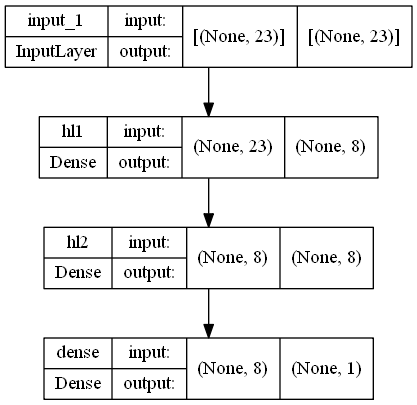

In [213]:
# 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [214]:
# 학습
model.fit(x_train, y_train,
          epochs=25, 
          verbose=1, 
          validation_split=0.1)

Epoch 1/25
29/29 [==============================] - 1s 11ms/step - loss: 9.3203 - accuracy: 0.7522 - val_loss: 6.6128 - val_accuracy: 0.8400
Epoch 2/25
29/29 [==============================] - 0s 4ms/step - loss: 1.7393 - accuracy: 0.7533 - val_loss: 1.0121 - val_accuracy: 0.6900
Epoch 3/25
29/29 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.7344 - val_loss: 1.3475 - val_accuracy: 0.8000
Epoch 4/25
29/29 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.7367 - val_loss: 1.4550 - val_accuracy: 0.8200
Epoch 5/25
29/29 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.7611 - val_loss: 0.8012 - val_accuracy: 0.6900
Epoch 6/25
29/29 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7567 - val_loss: 0.7711 - val_accuracy: 0.7300
Epoch 7/25
29/29 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.7633 - val_loss: 0.9268 - val_accuracy: 0.8100
Epoch 8/25
29/29 [=

In [215]:
# 모델 확인
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.7920


[0.47416815161705017, 0.7919999957084656]

In [216]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.16751361],
       [0.17602044],
       [0.00165036],
       [0.09557536],
       [0.4004588 ]], dtype=float32)

In [218]:
# y - (0,1) 변경
for idx, val in enumerate(y_pred):
    if val >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0
        
y_pred[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [219]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.84      0.93      0.88       207
         Yes       0.29      0.14      0.19        43

    accuracy                           0.79       250
   macro avg       0.56      0.53      0.53       250
weighted avg       0.74      0.79      0.76       250



- **locally model과 비교**
 - accracy : 0.01 상승
 - <0> recall : 0.07 상승
 - <1> precision : 0.56 상승
 - <1> recall : 0.26 감소
 
 
 - <1> recall 값이 매우 낮다.
 - 실제 이직한 직원 중 이직했다고 예측하는 recall값이 낮은 것으로 보아 예측모델 사용에 한계가 있을 것이다.

#### 결론
 - 데이터 불균형에 대한 해결이 필요.
 
 
 - **multilayer perceptron 구조** 
  - <1> recall 값을 제외 높은 수치를 기록하였으나, <1> recall 값이 0에 가까운 관계로 부적절한 예측모델.
 
 
 - **locally model**
  - 역시 <1> recall 값이 매우 낮다.
  
  
  - 두 모델 모두 <1> recall 값이 매우 낮다.
  - 데이터 불균형의 문제라고 생각된다.
  - 실제 이직한 직원 중 이직했다 라고 예측하는 상황은 예측모델에서 중요한 부분이므로 데이터에 문제가 없는지 확인이 필요하다.

#### oversampling

In [147]:
y.value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

In [148]:
# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

In [149]:
y_over.value_counts()

0    1050
1    1050
Name: Attrition, dtype: int64

In [150]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022) 

In [151]:
# 모델링 : Functional API
# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(24,))
hl = keras.layers.Dense(64, activation='relu', name='hl1')(il)
hl = keras.layers.Dense(64, activation='relu', name='hl2')(hl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = keras.models.Model(il,ol)

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

# 모델 요약
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 hl1 (Dense)                 (None, 64)                1600      
                                                                 
 hl2 (Dense)                 (None, 64)                4160      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


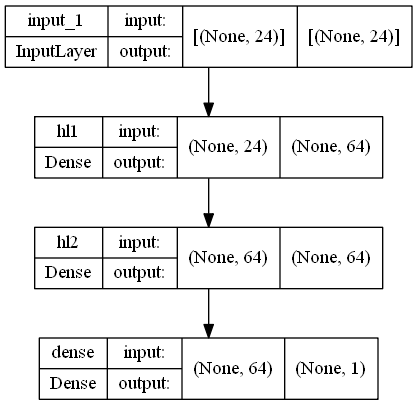

In [152]:
# 모델 시각화
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [153]:
model.fit(x_train, y_train,
          epochs=25, 
          verbose=1, 
          validation_split=0.1)

Epoch 1/25


ValueError: in user code:

    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 24), found shape=(None, 23)


In [ ]:
# 모델 확인
model.evaluate(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

In [ ]:
# y - (0,1) 변경
for idx, val in enumerate(y_pred):
    if val >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0
        
y_pred[:5]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, target_names=['No', 'Yes']))

#### over sampling 이후 multilayer perceptron구조
- accuracy : 0.17 감소
- <1> recall : 0.48 증가


- <1> recall의 증가가 있었으나, accuracy의 감소가 발생하였다.